In [1]:
from lib.pipeline import Pipeline
import os
import numpy as np
import tifffile as tiff
from scipy.ndimage import affine_transform
import matplotlib.pyplot as plt
from abakit.lib.CZIManager import extract_tiff_from_czi

/usr/local/share/pipeline/lib/python3.8/site-packages/tqdm-4.64.0-py3.8.egg/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
file = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK78/DK78_slide050_2022_05_24_axion2.czi'
out = '/home/zhw272/Desktop/test'
extract_tiff_from_czi(file,out,scale = 0.03125)

In [21]:
def align_image(INPUT,file):
    infile = os.path.join(INPUT, file)
    T = transforms[file]
    image = tiff.imread(infile)
    matrix = T[:2,:2]
    offset = T[:2,2]
    offset = np.flip(offset)
    image1 = affine_transform(image,matrix.T,offset)
    return image,image1,T

In [30]:
def show_aligned_image(id):
    file=f'{id}.tif'
    INPUT = pipeline.fileLocationManager.get_thumbnail_cleaned(pipeline.channel)
    image,image1,T = align_image(INPUT,file)
    INPUT = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK73/preps/CH1/thumbnail_aligned_extra_pad'
    imagep,imagep1,T = align_image(INPUT,file)
    plt.figure(figsize = [10,10])
    plt.subplot(2,2,1)
    plt.imshow(image)
    plt.subplot(2,2,2)
    plt.imshow(image1)
    plt.subplot(2,2,3)
    plt.imshow(imagep)
    plt.subplot(2,2,4)
    plt.imshow(imagep1)



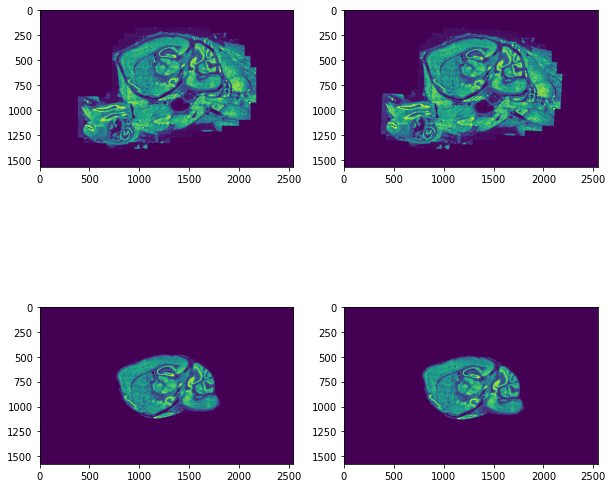

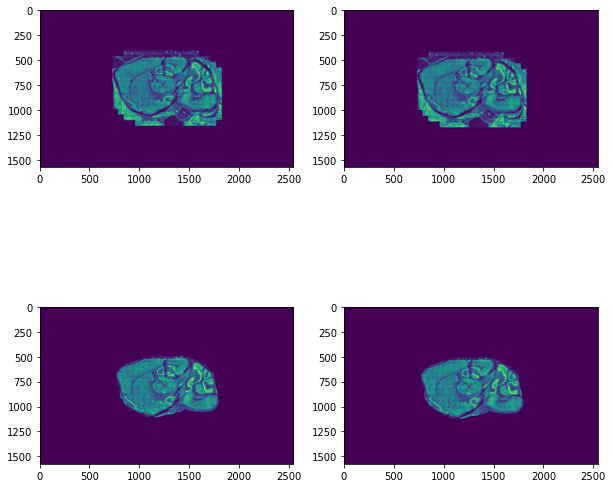

In [31]:
show_aligned_image(115)
show_aligned_image(114)